In [ ]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 日本語フォントの設定
try:
    import japanize_matplotlib
    print("japanize_matplotlib を使用して日本語フォントを設定しました")
except ImportError:
    # japanize_matplotlibが利用できない場合の代替設定
    plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
    print("代替フォント設定を使用しました")
sns.set(font="IPAexGothic")
# plt.rcParams['axes.unicode_minus'] = False

print("ライブラリのインポート完了")

japanize_matplotlib を使用して日本語フォントを設定しました
ライブラリのインポート完了


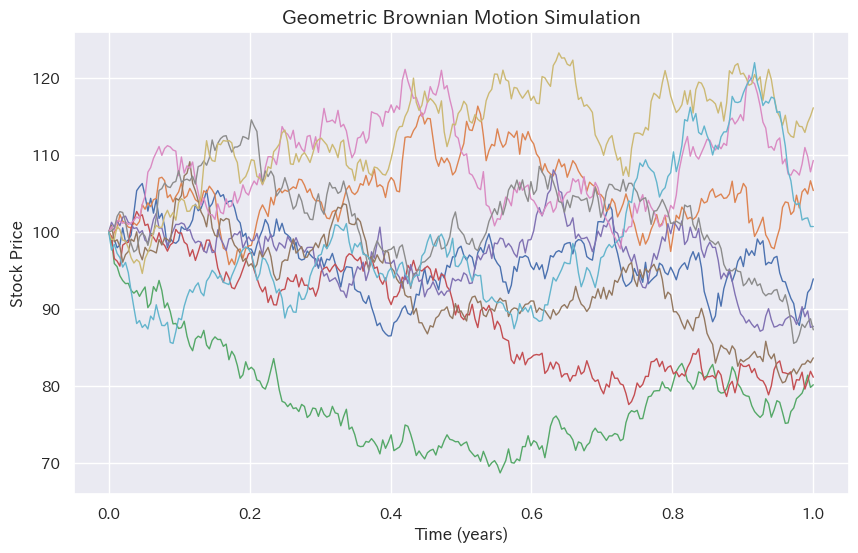

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
S0 = 100  # 初期株価
mu = 0.05  # 年間平均成長率（ドリフト）
sigma = 0.2  # ボラティリティ
T = 1.0  # 期間（1年）
N = 252  # 分割数（日次）
dt = T / N  # 時間刻み
M = 10  # シミュレーション本数

# シミュレーション
t = np.linspace(0, T, N + 1)
paths = np.zeros((M, N + 1))
paths[:, 0] = S0

for i in range(M):
    # 標準正規乱数生成
    z = np.random.standard_normal(N)
    # 幾何ブラウン運動の離散化近似
    for j in range(1, N + 1):
        paths[i, j] = paths[i, j - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z[j - 1])

# プロット
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, paths[i], lw=1)
plt.title("Geometric Brownian Motion Simulation", fontsize=14)
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()